In [ ]:
!pip install yfinance
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import yfinance as yf
import requests
import numpy as np
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ticket_template = yf.Ticker('TD.TO')
df_template = ticket_template.history(interval='1d', start = '2021-12-01', end='2022-02-01')
df_template['Date'] = df_template.index

In [ ]:
df_template.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2021-12-01,90.563616,92.174508,90.318053,90.347527,4237700,0.0,0,2021-12-01
2021-12-02,92.174507,95.032863,91.712855,94.787300,6046700,0.0,0,2021-12-02
2021-12-03,94.472980,94.581029,93.559486,93.893448,4197900,0.0,0,2021-12-03
2021-12-06,94.296175,94.551563,92.714749,92.773682,3536400,0.0,0,2021-12-06
2021-12-07,93.068367,93.697007,93.058542,93.215706,3691300,0.0,0,2021-12-07


In [ ]:
template1 = go.Figure(data=[go.Candlestick(x=df_template['Date'],
                open=df_template['Open'],
                high=df_template['High'],
                low=df_template['Low'],
                close=df_template['Close'])])

In [ ]:
template1.show()

In [ ]:
template1.write_image("template.png")

In [ ]:
URL = 'https://www.tsx.com/files/trading/interlisted-companies.txt'
response = requests.get(URL)
open('list_of_companies.txt', 'wb').write(response.content)

17270

In [ ]:
with open('list_of_companies.txt', 'r', encoding='utf-8') as companies_list:
  list_of_companies = companies_list.readlines()

In [ ]:
len(list_of_companies)

318

In [ ]:
companies_symbol = []
for linha in list_of_companies[3:]:
  a, b = linha.split(':')
  companies_symbol.append(a)

In [ ]:
start = '2021-12-01'
end = '2022-02-01'
files_dir = 'files_dir'
resultados = []

png_files = glob.glob('files_dir/*.png')

for png in png_files:
  try:
    os.remove(png)
  except:
    pass


try:
  os.makedirs(files_dir)
  print('Pasta criada: ' + files_dir )
except FileExistsError:
  print('Pasta existente: ' + files_dir)

for a in companies_symbol[:]:
  ticker = a
  ticket = yf.Ticker(ticker)
  df_to_search = ticket.history(interval='1d', start = start, end = end)
  df_to_search['Date'] = df_to_search.index
  to_search = go.Figure(data=[go.Candlestick(x=df_to_search['Date'],
                  open=df_to_search['Open'],
                  high=df_to_search['High'],
                  low=df_to_search['Low'],
                  close=df_to_search['Close'])])
  if len(df_to_search) !=0:
    #to_search.show()
    file_name = files_dir + '//' + a + '.png'
    to_search.write_image(file_name)
    print('Arquivo salvo: '+ a + '.png')

Pasta criada: files_dir
Arquivo salvo: ABST.png
- ABX: No data found for this date range, symbol may be delisted
Arquivo salvo: ACB.png
Arquivo salvo: ACST.png
Arquivo salvo: AEM.png
- AEX: No data found for this date range, symbol may be delisted
Arquivo salvo: AEZS.png
Arquivo salvo: AFM.png
Arquivo salvo: AGI.png
- AGLD: No data found, symbol may be delisted
- AII: No data found for this date range, symbol may be delisted
- AKE: No data found, symbol may be delisted
Arquivo salvo: AKU.png
Arquivo salvo: ALT.png
Arquivo salvo: ALTS.png
Arquivo salvo: ALYA.png
- AMM: No data found for this date range, symbol may be delisted
- AOI: No data found for this date range, symbol may be delisted
- APS: No data found for this date range, symbol may be delisted
- APY: No data found, symbol may be delisted
Arquivo salvo: AQN.png
Arquivo salvo: ASM.png
- ASTL.WT: No data found, symbol may be delisted
Arquivo salvo: ASTL.png
- AT: No data found, symbol may be delisted
Arquivo salvo: AUMN.png
Arqui

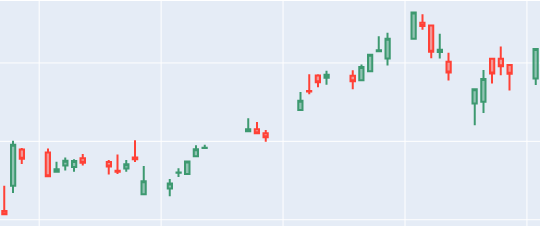

In [ ]:
template = cv2.imread('template.png')
##template = template[372:420, 80:620]
template = template[99:325, 80:620]
cv2_imshow(template)

files_dir/TD.png (80, 88)


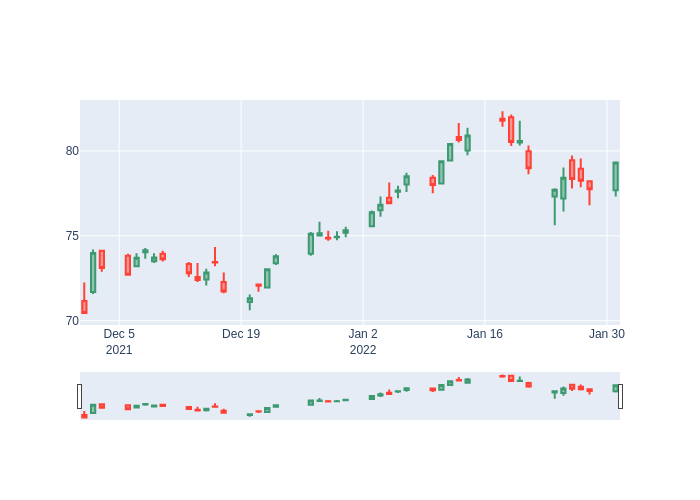

files_dir/BNS.png (80, 80)


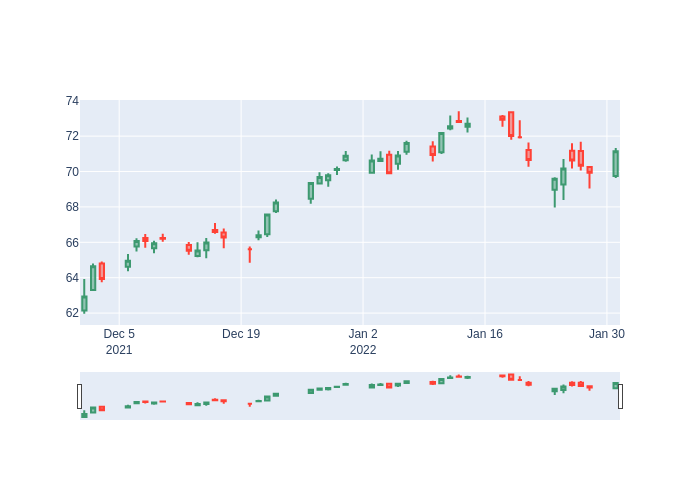

files_dir/CVE.png (80, 86)


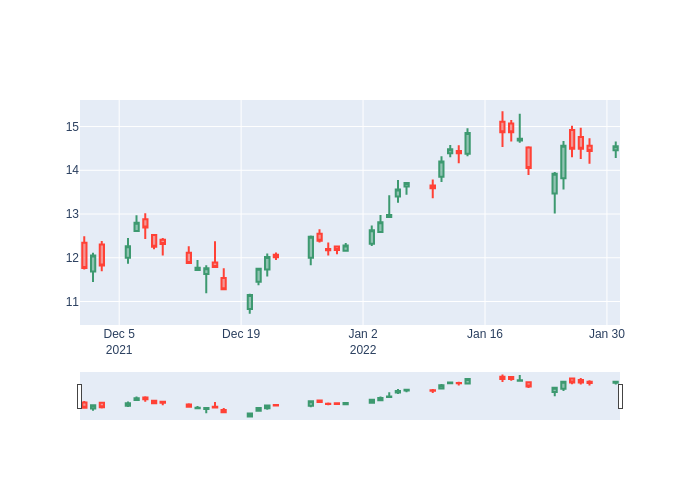

files_dir/ERF.png (80, 86)


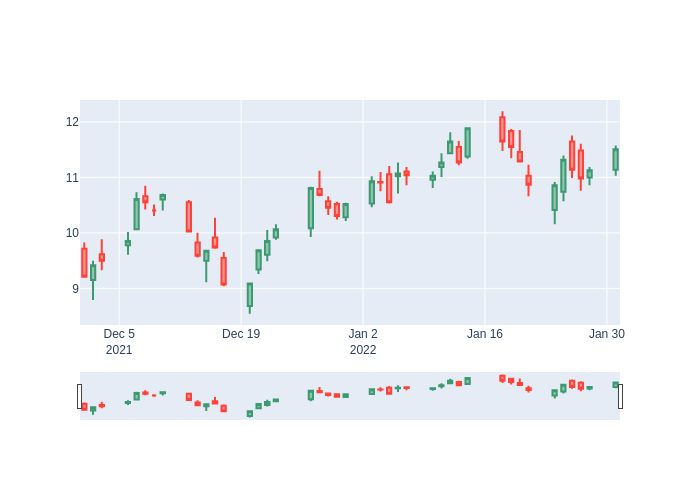

files_dir/SU.png (80, 90)


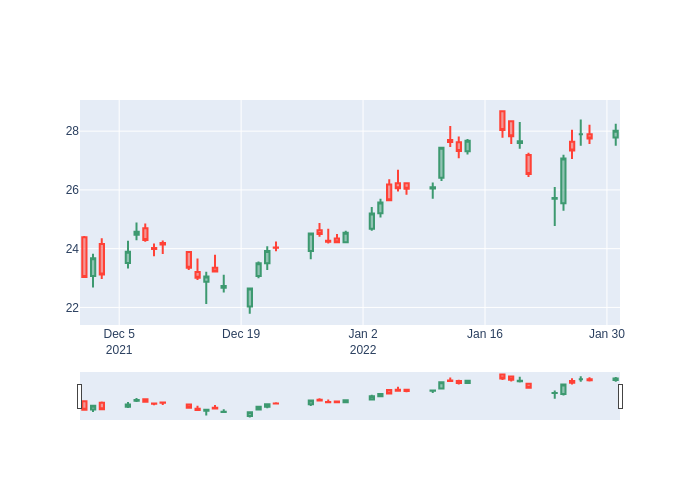

files_dir/BMO.png (80, 93)


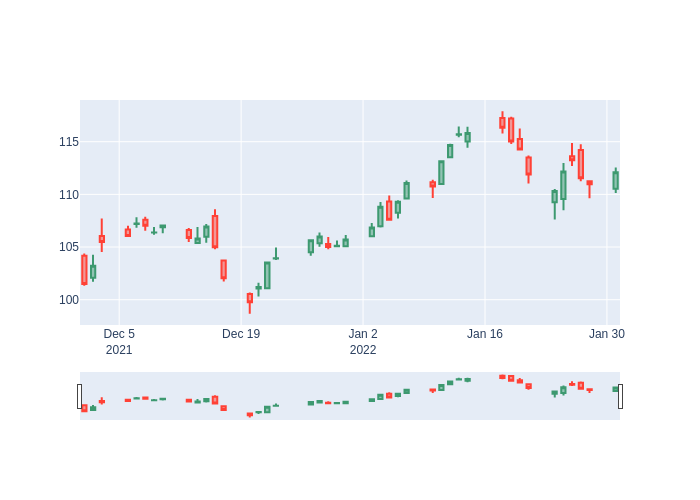

files_dir/OVV.png (80, 84)


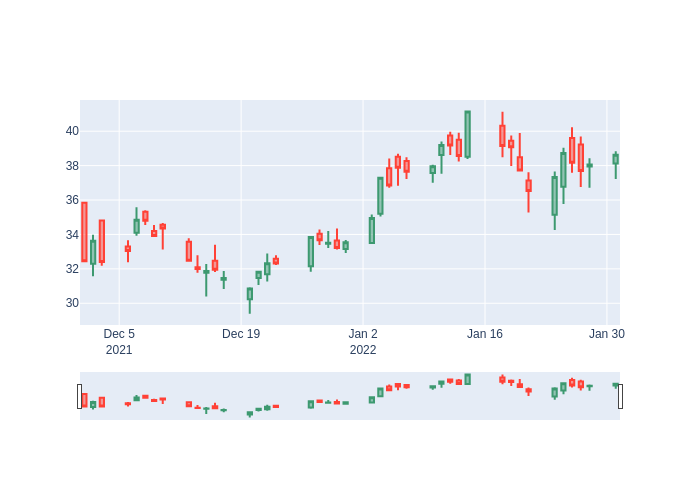

In [ ]:
files_list = [f for f in glob.glob("files_dir/*.png")]
if len(resultados) > 0:
  resultados = []
for file_names in files_list:
  img = cv2.imread(file_names)
  res = cv2.matchTemplate(img, template, method=cv2.TM_CCOEFF_NORMED)
  ##print(file_names + ' ' + str(res[0]) + ' ' + str(start) + ' ' + str(end))
  c, w, h = template.shape[::-1]
  ##threshold = 0.4
  threshold = 0.3
  loc = np.where( res >= threshold)
  ##print(file_names, list(zip(*loc[::-1])))
  if len(list(zip(*loc[::-1]))) != 0:
    print(file_names, list(zip(*loc[::-1]))[0])
    resultados.append(file_names + ' ' + str(str(start) + ' ' + str(end)))
    cv2_imshow(img)
  ##print('Template')
  ##cv2_imshow(template)

In [ ]:
for a in resultados:
  print(a)

files_dir/TD.png 2021-12-01 2022-02-01
files_dir/BNS.png 2021-12-01 2022-02-01
files_dir/CVE.png 2021-12-01 2022-02-01
files_dir/ERF.png 2021-12-01 2022-02-01
files_dir/SU.png 2021-12-01 2022-02-01
files_dir/BMO.png 2021-12-01 2022-02-01
files_dir/OVV.png 2021-12-01 2022-02-01



```
files_dir/TD.png 2021-12-01 2022-02-01
files_dir/ERF.png 2021-12-01 2022-02-01
files_dir/BNS.png 2021-12-01 2022-02-01
files_dir/OVV.png 2021-12-01 2022-02-01
files_dir/BMO.png 2021-12-01 2022-02-01
files_dir/CVE.png 2021-12-01 2022-02-01
files_dir/SU.png 2021-12-01 2022-02-01
```



In [ ]:
etf_lista = []
print('TD')
template1.show()
for a in resultados:
  b, d, e = a.split(' ')
  f, g = b.split('.')
  h, i = f.split('/')
  ticker = i
  ticket = yf.Ticker(ticker)
  df_to_search = ticket.history(interval='1d', start = start, end = end)
  df_to_search['Date'] = df_to_search.index
  to_search = go.Figure(data=[go.Candlestick(x=df_to_search['Date'],
                  open=df_to_search['Open'],
                  high=df_to_search['High'],
                  low=df_to_search['Low'],
                  close=df_to_search['Close'])])
  etf_lista.append(i)
  print(i)
  to_search.show()

TD


TD


BNS


CVE


ERF


SU


BMO


OVV


In [ ]:
print(resultados)
print(etf_lista)

['files_dir/TD.png 2021-12-01 2022-02-01', 'files_dir/BNS.png 2021-12-01 2022-02-01', 'files_dir/CVE.png 2021-12-01 2022-02-01', 'files_dir/ERF.png 2021-12-01 2022-02-01', 'files_dir/SU.png 2021-12-01 2022-02-01', 'files_dir/BMO.png 2021-12-01 2022-02-01', 'files_dir/OVV.png 2021-12-01 2022-02-01']
['TD', 'BNS', 'CVE', 'ERF', 'SU', 'BMO', 'OVV']


correlação
dtw
pearson


In [ ]:
etf = ' '.join(etf_lista)
df  = yf.download (etf, 
                   start = '2021-12-01', 
                   end='2022-02-01',
                   interval = "1d",
                   group_by = 'ticker',
                   progress = False)

In [ ]:
df['TD'].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
for etf in etf_lista:
  df[(etf, 'Return')] = df[(etf, 'Close')].pct_change()

In [ ]:
colunas = list()
for elem in etf_lista:
    colunas.append((elem, 'Return'))
dg = df.filter(items=colunas)
dg.columns = etf_lista
dg.head()

,TD,BNS,CVE,ERF,SU,BMO,OVV
Date,,,,,,,
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,0.050049,0.027195,0.024597,0.022678,0.013854,0.016920,0.036675
2021-12-03,-0.011816,-0.011044,-0.019040,0.008448,-0.023602,0.021772,-0.036557
2021-12-06,-0.005509,0.016062,0.037131,0.037696,0.033503,0.005490,0.019584
2021-12-07,0.013780,0.017163,0.043938,0.076690,0.028724,0.011105,0.055222


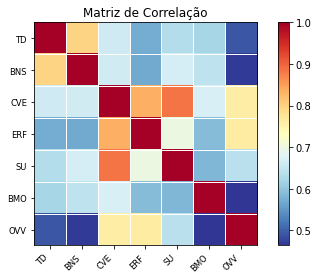

In [ ]:
correlacao = dg.corr()
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
correlacao.head(1)

,TD,BNS,CVE,ERF,SU,BMO,OVV
TD,1.0,0.797722,0.661182,0.572236,0.634014,0.621766,0.493032


In [ ]:
### serar os dados
### resultados = []